Q1. Gender Classification

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA (countplots, show images, find missing values etc.)

a. Use Base SVM(LinearSVC) model.

b. Create a CNN model with 3 Conv2D layers, 3 Maxpooling2D layers, any extra layers necessary.

c. Get atleast 90% test accuracy using the above CNN model.

Data: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

data_dir = '/content/drive/MyDrive/mid1.zip'

In [ ]:
import zipfile


zip_file = zipfile.ZipFile("/content/drive/MyDrive/mid1.zip")


zip_file.extractall()


zip_file.close()



In [ ]:
import os
root_path =('./content/Training')
male_path = os.path.join('./content/Training/male')
female_path = os.path.join('./content/Training/female')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import *
datagen = ImageDataGenerator(rescale=1/255)

train_generator = datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(50, 50),  # All images will be resized to50,50
        batch_size=80,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 47009 images belonging to 2 classes.


In [ ]:
mkdir ./content

In [ ]:
mkdir ./content/Training

In [ ]:
root_path= '/content/Training'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(os.path.join(root_path, name))) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 23243 
male : 23766


In [ ]:
root_path = '/content/Training'
male_path = os.path.join(root_path, 'male')
female_path = os.path.join(root_path, 'female')
male_images = [os.path.join(male_path, img) for img in os.listdir(male_path)]
female_images = [os.path.join(female_path, img) for img in os.listdir(female_path)]

In [ ]:
X = male_images + female_images
y = np.concatenate([np.zeros(len(male_images)), np.ones(len(female_images))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

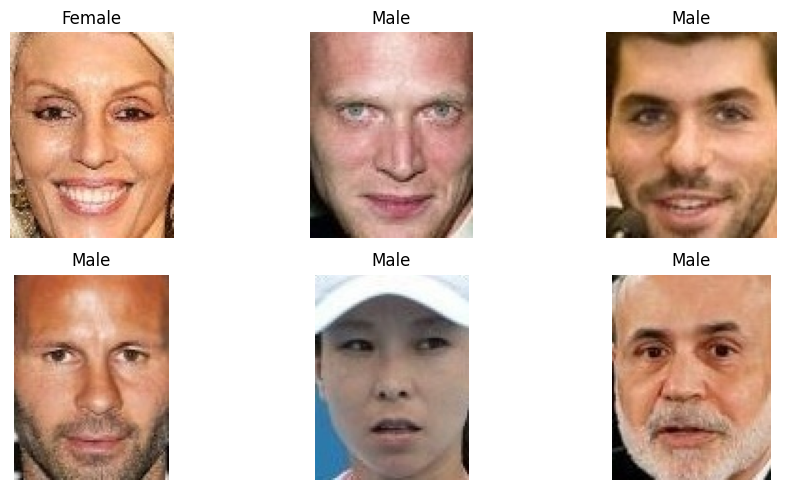

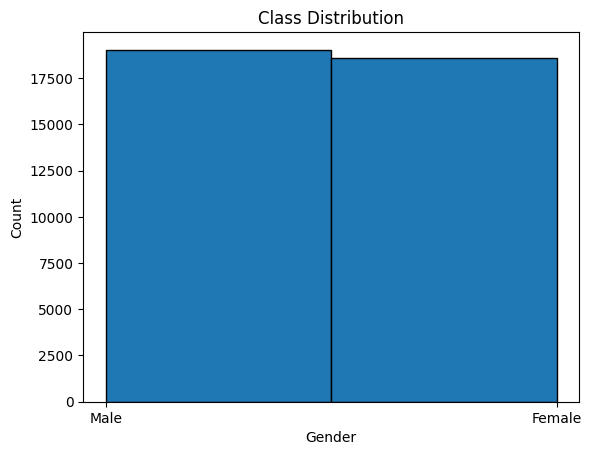

In [ ]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(6):
        img = Image.open(images[i])
        num = int(i + 1)
        plt.subplot(2, 3, num)
        plt.imshow(img)
        plt.title('Male' if labels[i] == 0 else 'Female')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
plot_images(X_train, y_train)
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svm_model = make_pipeline(CountVectorizer(), LinearSVC())
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", svm_accuracy)


Accuracy: 1.0


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/Training',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)

valid_generator = datagen.flow_from_directory(
    '/content/Validation',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)
history = cnn_model.fit(train_generator, validation_data=valid_generator, epochs=40)
test_loss, test_accuracy = cnn_model.evaluate(valid_generator)
print("CNN Test Accuracy:", test_accuracy)


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Epoch 1/40
735/735 [==============================] - 35s 43ms/step - loss: 0.2454 - accuracy: 0.8962 - val_loss: 0.1224 - val_accuracy: 0.9581
Epoch 2/40
735/735 [==============================] - 33s 45ms/step - loss: 0.1424 - accuracy: 0.9494 - val_loss: 0.1101 - val_accuracy: 0.9615
Epoch 3/40
735/735 [==============================] - 35s 47ms/step - loss: 0.1231 - accuracy: 0.9564 - val_loss: 0.1047 - val_accuracy: 0.9605
Epoch 4/40
735/735 [==============================] - 32s 43ms/step - loss: 0.1100 - accuracy: 0.9602 - val_loss: 0.1080 - val_accuracy: 0.9605
Epoch 5/40
735/735 [==============================] - 31s 43ms/step - loss: 0.1024 - accuracy: 0.9635 - val_loss: 0.0996 - val_accuracy: 0.9638
Epoch 6/40
735/735 [==============================] - 31s 43ms/step - loss: 0.0904 - accuracy: 0.9678 - val_loss: 0.1057 - val_accuracy: 0.9607
Epoch 7/40
735/735 [==============================